In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [8]:
# Load model 
model = YOLO(r"C:\Users\asus\Downloads\SawitPRO\Count\Model Count Sawit.pt")  # Update path accordingly
print("Model loaded successfully!")

# Load image
image_path = r"C:\Users\asus\Downloads\SawitPRO\Count\ai_assignment_20241202_count.jpeg"  # Update path accordingly
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Model loaded successfully!


In [5]:
# Object detection
results = model(image, conf=0.25, iou=0.3, max_det=10000)
num_pohon = len(results[0].boxes)
print(f"Total of oil palm trees detected: {num_pohon}")


0: 800x704 404 Sawits, 809.7ms
Speed: 15.1ms preprocess, 809.7ms inference, 401.6ms postprocess per image at shape (1, 3, 800, 704)
Total of oil palm trees detected: 404


In [6]:
# Image annotation
annotated_image = image.copy()
for i, box in enumerate(results[0].boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 255), 5)
    cv2.putText(annotated_image, str(i + 1), (x1 + 10, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 255), 5, cv2.LINE_AA)

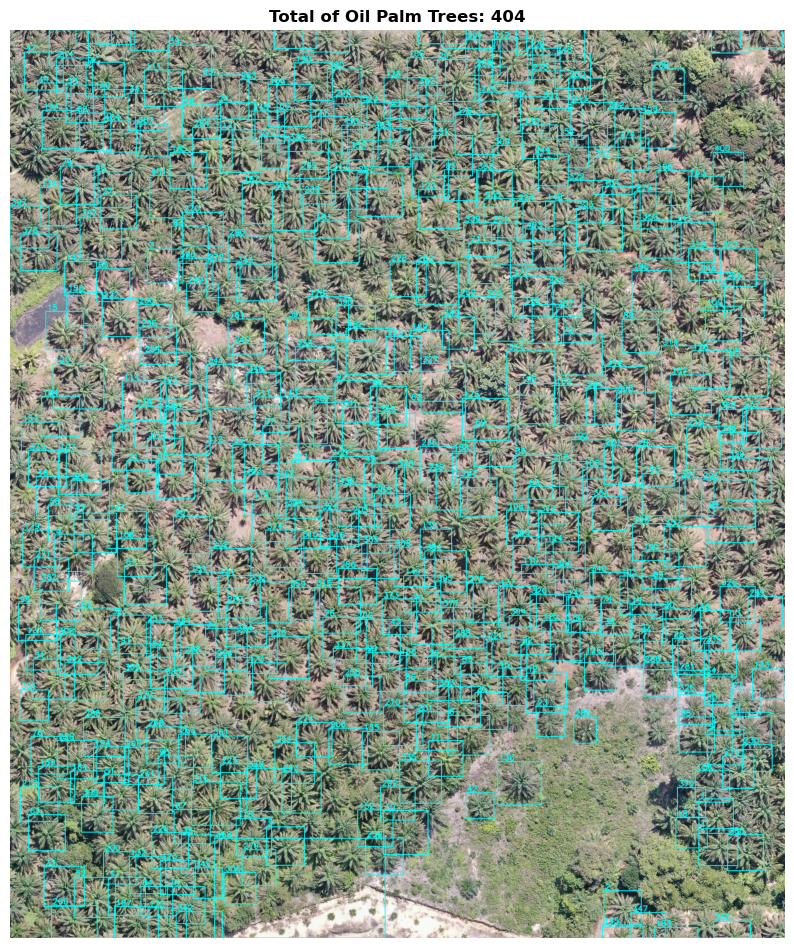

In [7]:
# Show image results with the total number of oil palm trees
plt.figure(figsize=(10, 12))
plt.imshow(annotated_image)
plt.axis("off")
plt.title(f"Total of Oil Palm Trees: {num_pohon}", fontsize=12, fontweight="bold")
plt.show()